# Introduction
---

This notebook is about learning to compare 3 common ML model in classifier (Logistic Regression, KNN, Dtree) including pre-processing and tuning hyperparameter to get the best result.

**In this dataset, the data incline (imbalanced) more to the patients who are diagnosed as negative** and causing the development of the model become bias that the prediction is more likely to result as negative diabetes.

Therefore, the solution of this dataset is to **create a model that has high sensitivity in detecting** whether the patient is positive or negative diabetes in order to overcome the bias. This kind of model will work best rather than a model that has high accuracy in predicting , yet the sensitivity is low that cause the bias in detecting the diagnose to negative only because the accuracy will count the whole data and sensitivity will count only those who are diagnosed positive diabetes.

Below are the table of the content:
- <a href='#1'>1. EDA</a>
- <a href='#2'>2. Raw Data ML Modeling & Evaluation for Benchmark</a>
- <a href='#3'>3. Pre-Processing</a>
    - <a href='#3.1'>3.1 Dealing with Outliers</a>
    - <a href='#3.2'>3.2 Dealing with Normal and Skewed Distribution</a>
    - <a href='#3.3'>3.3 Dealing with Different Units Measurement</a>
- <a href='#4'>4. Pre-Processed Data ML Modeling & Evaluation</a>
- <a href='#5'>5. Hypertuning Parameters with Grid & Random Search</a>
- <a href='#6'>6. Evaluation</a>


Dataset originally from https://www.kaggle.com/uciml/pima-indians-diabetes-database

# Data Import & Collection
---

In [28]:
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [29]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA<a id='1'>
---

## Descriptive Analysis

**Dataset Information:**
> - Pregnancies: Number of times pregnant
> - Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
> - Blood Pressure: Diastolic blood pressure (mm Hg)
> - Skin Thickness: Triceps skin fold thickness (mm)
> - Insulin: 2-Hour serum insulin (mu U/ml)
> - BMI: Body mass index (weight in kg/(height in m)^2)
> - Diabetes pedigree function: Self-Explained
> - Age: Years
> - Outcome: 1 is True, 0 is False

### Column, NULL Values, DTypes
See if the dataset count did not match with number of row and as well if any of column have mismatch Dtype

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Statistical Summary

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Descriptive Analysis Summary
> - According to df.info() above, there are no null data that we have to deal with later in pre-processing.
> - Dtype on every features is make sense hence no need to change it in the pre-processing.
> - Based on statistical summary above, there is data issue with people registered with 0 Glucose, 0 Blood Pressure, 0 Skin Thickness. This might be a wrong data input. 
> - There are a great outlier for example a data with 17 pregancies. Other than that we can see several data with Outliers that will be processed in the next step.

## Univariate Analysis

Let's analyze data distribution of each column individually!

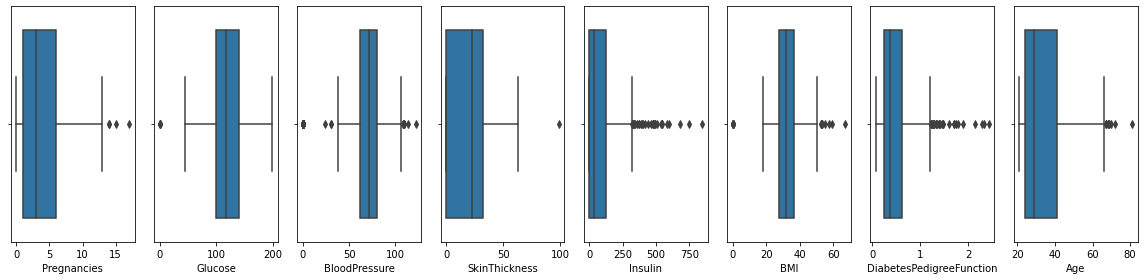

In [140]:
plt.figure(figsize=(16,4))
for i in range(0, len(numericals)):
    plt.subplot(1,8, i+1)
    sns.boxplot(x=df[numericals[i]])
    plt.tight_layout()

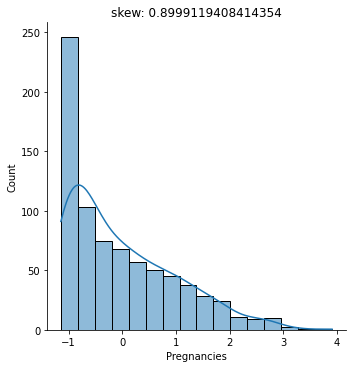

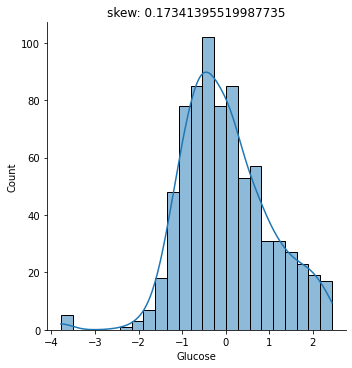

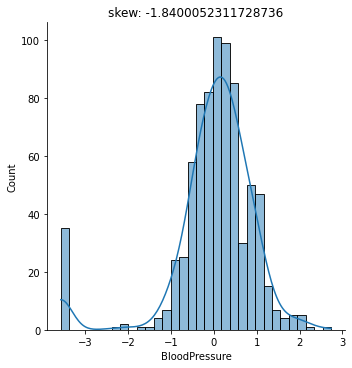

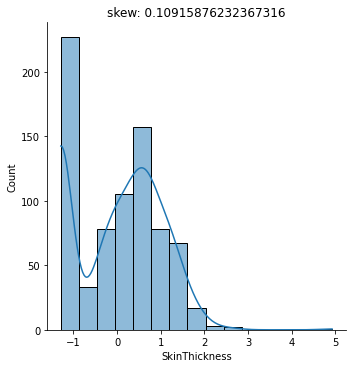

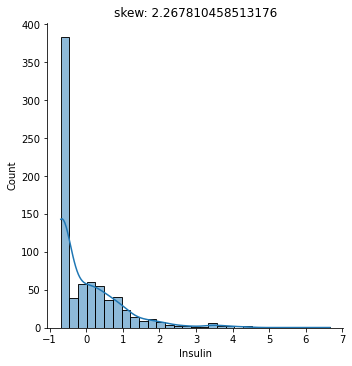

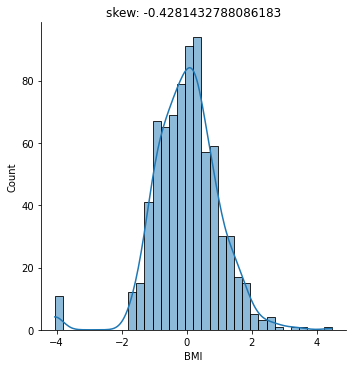

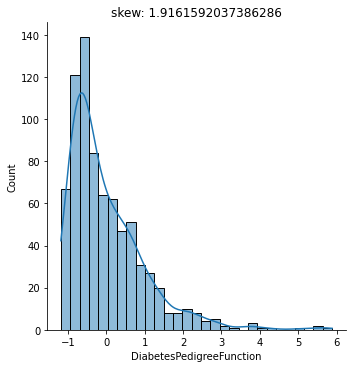

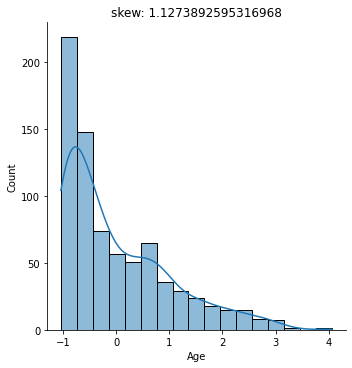

In [23]:
for i in range(0, len(numericals)):
    sns.displot(data=XD, x=XD[numericals[i]], kde=True)
    plt.title('skew: {}'.format(skew(XD[numericals[i]])))
    plt.tight_layout

Text(0, 0.5, 'Frequency')

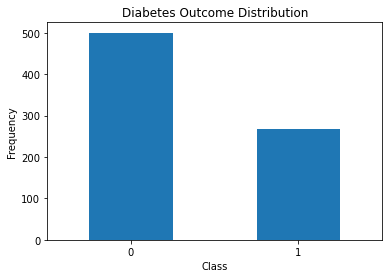

In [19]:
count_classes = pd.value_counts(df['Outcome'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title('Diabetes Outcome Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')

### Univariate Analysis Summary
> - According to boxplot visualization, we have Outliers in every indepdent features where some are lot and some only a few.
> - According to distribution visualization, we see that there are only 2 features haivng a normal distribution where other features is skewed. This might impact how we will deal with the pre-processing later when we have to remove the Outliers.
> - According to the bar plot above, our target data is imbalance towards to detected as not diabetes. This might impact on our ML evaluation, therefore during pre-processing we can use oversampling so we can make data more balance for modeling. 

# Multivariate Analysis
---

Let's analyze how each columns relationship strength to each other by using Correlation and Pairplot!

## Correlation & Heatmap

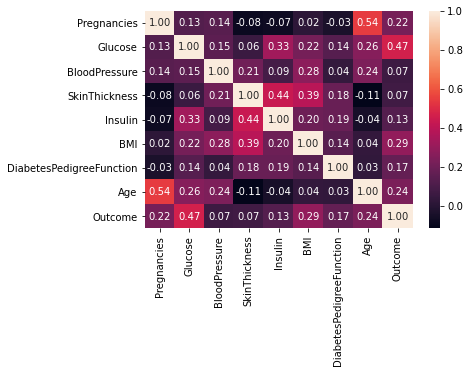

In [143]:
sns.heatmap(df.corr(), annot=True,  fmt='.2f')
plt.show()

## Pairplot

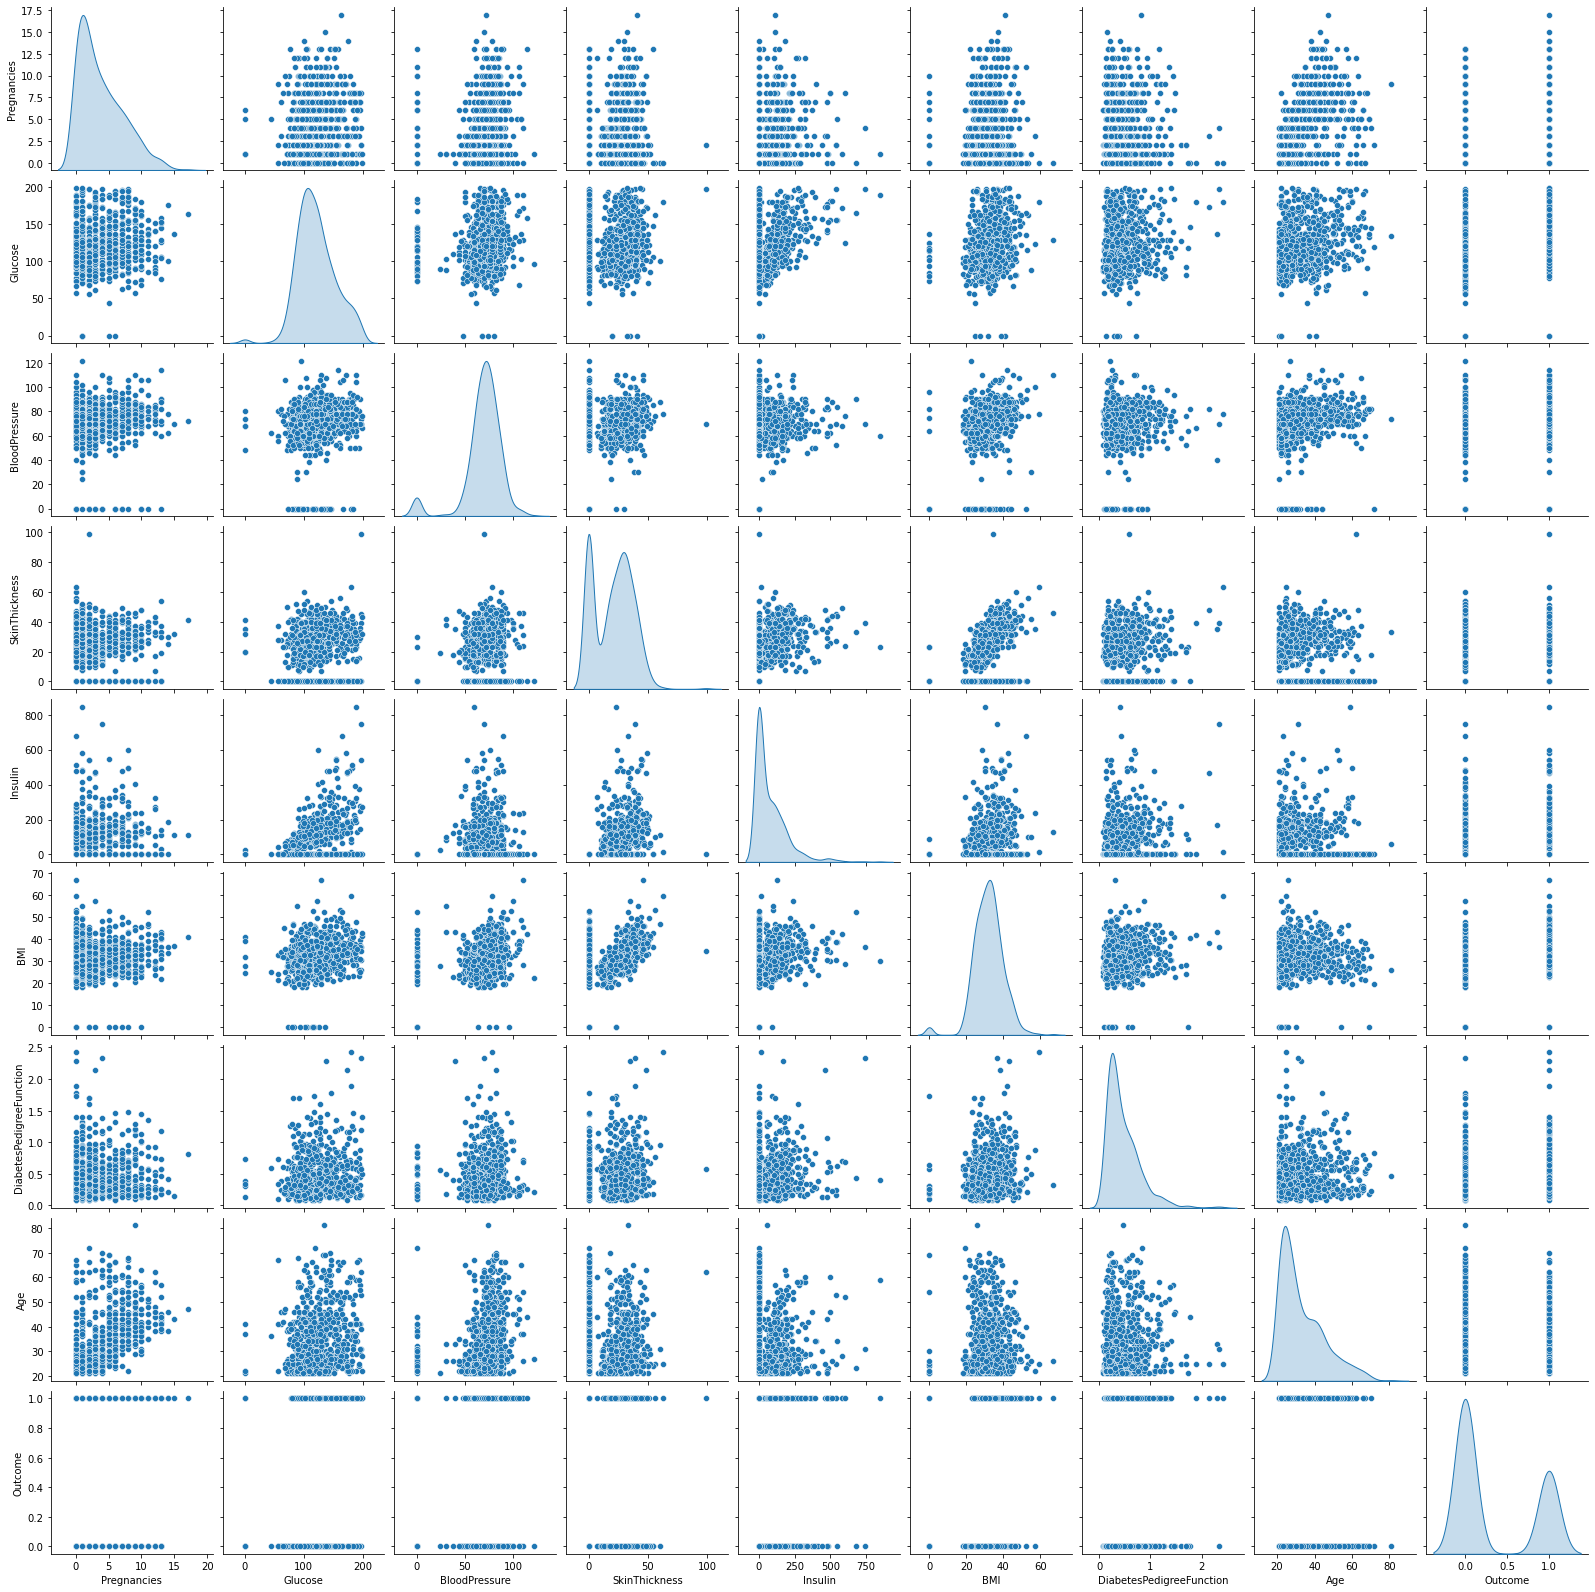

In [144]:
sns.pairplot(df, diag_kind='kde')

## Pairplot + Hue

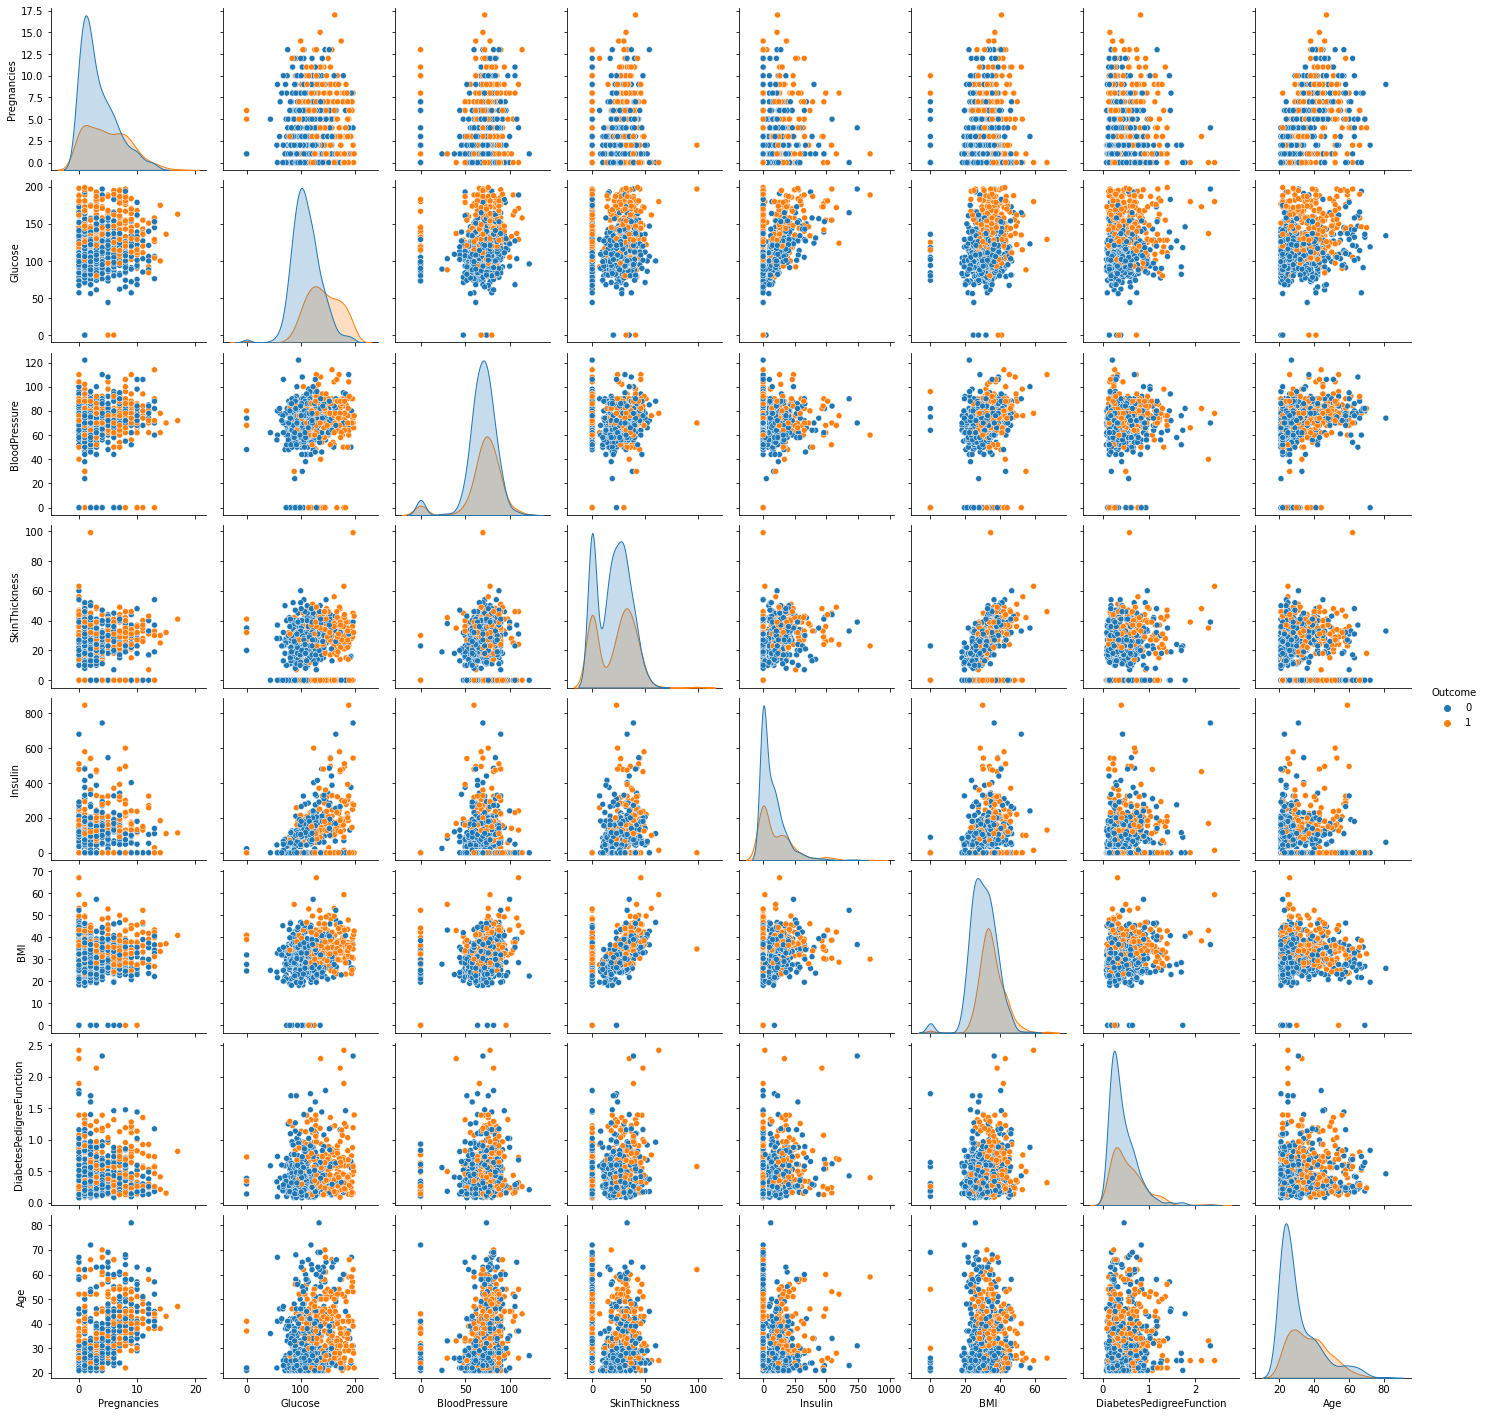

In [145]:
sns.pairplot(df, diag_kind='kde', hue='Outcome')

## Multivariate Analysis Summary
> - According to heatmap visualization, there are no strong relationship between each independent features hence all features will be selected in Modeling.
> - According to pairplot visualization, in each independent feature there are just a little pattern showing different clusters.

## Feature Selection & Categorization

Based on all summary above, all independent features will be selected and will be categorized as numericals.

In [30]:
numericals = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target = ['Outcome']

- - -
# Modeling w/o Pre-processing (Raw Dataset)

Develop the first ML model without any pre-processing. The goal is to compare the model performance raw data and pre-processed data later.

## Split Train Test Data

In [39]:
X = df[numericals]
y = df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0) #Using 70-30 Rule
X_train.shape

(537, 8)

## Logistic Regression (Raw Data)

### Fit & Predict

In [40]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(random_state=0, max_iter=400)
logReg.fit(X_train, y_train)
y_predicted = logReg.predict(X_test)
y_predicted_proba = logReg.predict_proba(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Evaluation

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score,  roc_auc_score, precision_score
print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted))

print('\n======================\nClassification Report:\n') # generate the confusion matrix
print(classification_report(y_test, y_predicted))


confustion matrix
[[141  16]
 [ 35  39]]

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



## Logistic Regression Evaluation

> - We're having a good start with 0.78 accuracy in overall in the Logistic Regression. However as described in the introduction, the data is biased toward the negative diabetes making evaluation unfair. 
> - Checking on Recall score, if the patient that actually diabetes, the model only label as positive diabetes at 0.53 rate. However if patient actually negative and labeling it as negative the model perform at 0.90 rate. The model is still very confused to label actual diabetes patient as positive diabetes and as well as make a stronger assumption that the dataset is biased to negative diabetes.
> - Let's check on the Precision, when we predict negative and actually negative, the model perform good at 0.80 and as well predicting positive and actually positif at 0.71. The precision have a great evaluation here.
> - at F1-Score we had averaged 0.85 rate at the negative diabetes but still low at 0.60 averaged in positive diabetes. 

## KNN (Raw Data)

### Fit & Predict

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) #using default value
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)
print(y_predicted)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


### Evaluation

In [47]:
print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted))


print('\n======================\nClassification Report:\n') # generate the confusion matrix
print(classification_report(y_test, y_predicted))


confustion matrix
[[123  34]
 [ 30  44]]

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       157
           1       0.56      0.59      0.58        74

    accuracy                           0.72       231
   macro avg       0.68      0.69      0.69       231
weighted avg       0.73      0.72      0.72       231



## KNN Evaluation
> - We're having a good start with evaluation at 0.78 accuracy in overall. However same as before the data is biased toward the negative diabetes making evaluation unfair. 
> - Checking on Recall score, if the patient that actually diabetes, the model only label as positive diabetes at 0.53 rate. However if patient actually negative and labeling it as negative the model perform at 0.85 rate. The model is still very confused to label actual diabetes patient as positive diabetes and as well as make a stronger assumption that the dataset is biased to negative diabetes.
> - Let's check on the Precision, when we predict negative and actually negative, the model perform good at 0.80 and as well predicting positive and actually positif at 0.63. Comparing with Logistic Regression, KNN have worst evaluation at the precision. 
> - at F1-Score, this KNN model averaged lower than Logistic Regression at scoring positive and negative diabetes.

## DTree (Gini as default) 

### Fit & Predict

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0) #using entropy as calculation
dt.fit(X_train, y_train)
y_predicted = dt.predict(X_test)
print(y_predicted)

[1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1
 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 1 0 0 0]


### Evaluation

In [48]:
print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted))

print('\n======================\nClassification Report:\n') # generate the confusion matrix
print(classification_report(y_test, y_predicted))


confustion matrix
[[123  34]
 [ 30  44]]

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       157
           1       0.56      0.59      0.58        74

    accuracy                           0.72       231
   macro avg       0.68      0.69      0.69       231
weighted avg       0.73      0.72      0.72       231



## Decision Tree (Gini) Evaluation
> - The model evaluate at 0.72 accuracy in overall which is lower than 2 other models. However same as before the data is still biased toward the negative diabetes making evaluation unfair. 
> - On Recall, the model is still pretty bad at labeling actual positive diabetes as other 2 models and just good at labeling actual negative diabetes.
> - On the Precision, the model evaluation is also still bad at predicting positive diabetes but good at predicting negative diabetes. 
> - at F1-Score, this DTree model averaged not great at scoring positive diabetes and just good at scoring negative diabetes.

- - -
# Pre-Processing

In Pre-Processing part, we're going to use few techniques such as find missing data, duplicated data, outliers, standarization/normalization, feature encoding and Over/Undersampling.

## Dealing with Outliers

We're going to use a boxplot in our Univariate analysis to detect outliers visualization

In [49]:
from scipy.stats import norm
df_p1 = df #df_p1 to separate data between RAW and Preprocessed.

Text(0.5, 1.0, 'skew: 0.8999119408414357')

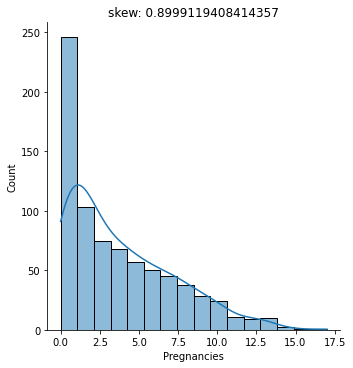

In [50]:
sns.displot(data=df_p1, x="Pregnancies", kde=True)
plt.title('skew: {}'.format(skew(df_p1['Pregnancies'])))

Q1= 1.0 Q3= 6.0 IQR= 5.0 low_limit= -6.5 high_limit= 13.5


Text(0.5, 1.0, 'skew: 0.8211407166019743')

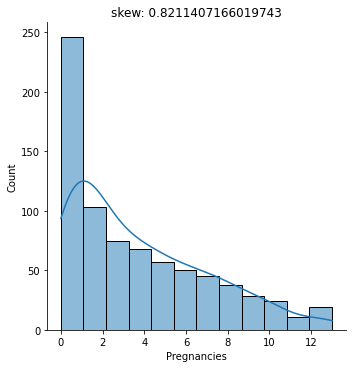

In [51]:
#Using IQR since pregnancies data is skewed.
Q1 = df_p1['Pregnancies'].quantile(0.25)
Q3 = df_p1['Pregnancies'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df_p1['Pregnancies'] >= low_limit) & (df_p1['Pregnancies'] <= high_limit))
df_p1 = df_p1[filtered_entries]
print('Q1=',Q1,'Q3=',Q3,'IQR=',IQR,'low_limit=',low_limit,'high_limit=',high_limit)

#plot the new data after outliers removed.
sns.displot(data=df_p1, x="Pregnancies", kde=True)
plt.title('skew: {}'.format(skew(df_p1['Pregnancies'])))

Text(0.5, 1.0, 'skew: 0.17673187869330942')

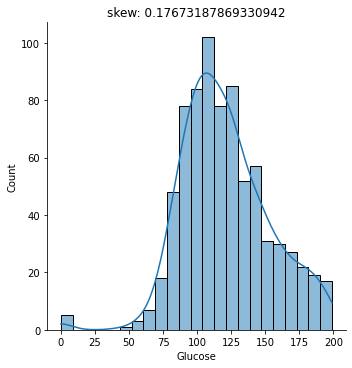

In [52]:
sns.displot(data=df_p1, x="Glucose", kde=True)
plt.title('skew: {}'.format(skew(df_p1['Glucose'])))

Text(0.5, 1.0, 'skew: 0.5357716521329466')

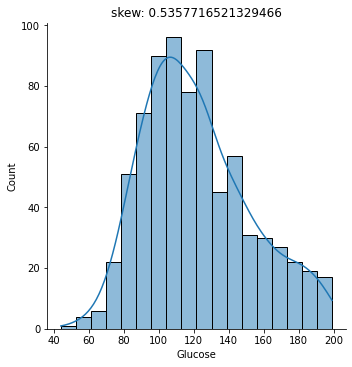

In [53]:
# using Z-Score as the data distribution is normal
from scipy import stats
z_scores = np.abs(stats.zscore(df_p1['Glucose']))
filtered_entries = (z_scores < 3)
df_p1 = df_p1[filtered_entries]

sns.displot(data=df_p1, x="Glucose", kde=True)
plt.title('skew: {}'.format(skew(df_p1['Glucose'])))

Text(0.5, 1.0, 'skew: -1.8352059125972198')

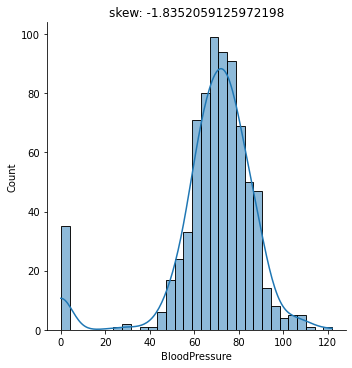

In [54]:
sns.displot(data=df_p1, x="BloodPressure", kde=True)
plt.title('skew: {}'.format(skew(df_p1['BloodPressure'])))

Text(0.5, 1.0, 'skew: 0.13501578760848384')

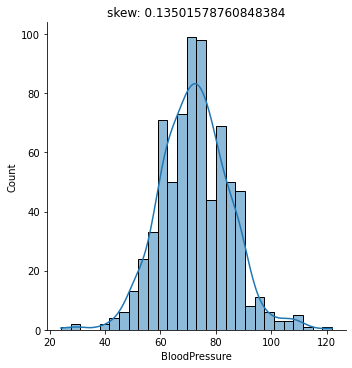

In [55]:
# using Z-Score as the data distribution is normal
from scipy import stats
z_scores = np.abs(stats.zscore(df_p1['BloodPressure']))
filtered_entries = (z_scores < 3)
df_p1 = df_p1[filtered_entries]
sns.displot(data=df_p1, x="BloodPressure", kde=True)
plt.title('skew: {}'.format(skew(df_p1['BloodPressure'])))

Text(0.5, 1.0, 'skew: 0.06140328488279974')

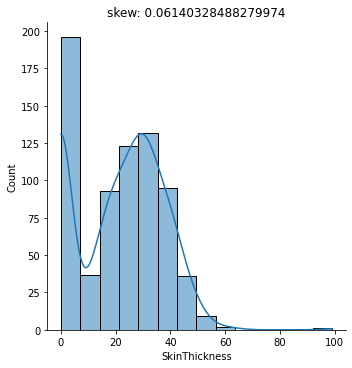

In [56]:
sns.displot(data=df_p1, x="SkinThickness", kde=True)
plt.title('skew: {}'.format(skew(df_p1['SkinThickness'])))

Text(0.5, 1.0, 'skew: -0.08929043766197266')

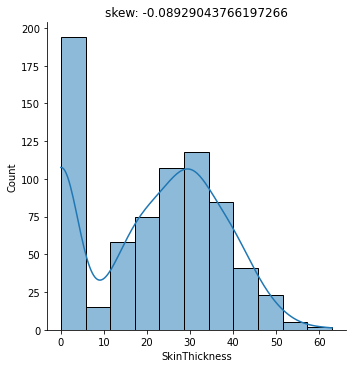

In [57]:
# using Z-Score as the data distribution is normal
from scipy import stats
z_scores = np.abs(stats.zscore(df_p1['SkinThickness']))
filtered_entries = (z_scores < 3)
df_p1 = df_p1[filtered_entries]
sns.displot(data=df_p1, x="SkinThickness", kde=True)
plt.title('skew: {}'.format(skew(df_p1['SkinThickness'])))

Text(0.5, 1.0, 'skew: 2.2031491483303123')

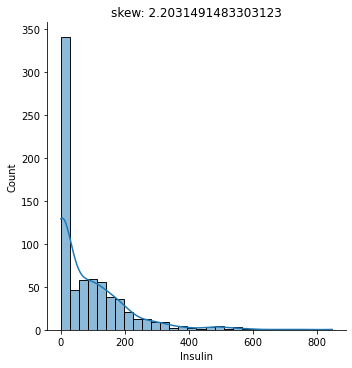

In [58]:
sns.displot(data=df_p1, x="Insulin", kde=True)
plt.title('skew: {}'.format(skew(df_p1['Insulin'])))

Q1= 0.0 Q3= 130.0 IQR= 130.0 low_limit= -195.0 high_limit= 325.0


Text(0.5, 1.0, 'skew: 1.061569063519779')

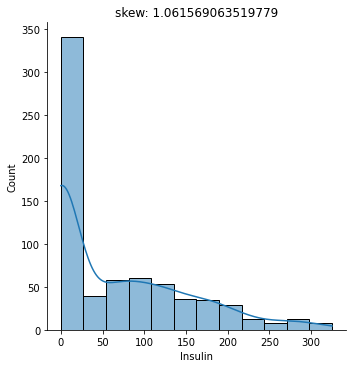

In [59]:
# Using IQR as data distribution is skewed
Q1 = df_p1['Insulin'].quantile(0.25)
Q3 = df_p1['Insulin'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
print('Q1=',Q1,'Q3=',Q3,'IQR=',IQR,'low_limit=',low_limit,'high_limit=',high_limit)
filtered_entries = ((df_p1['Insulin'] >= low_limit) & (df_p1['Insulin'] <= high_limit))
df_p1 = df_p1[filtered_entries]
sns.displot(data=df_p1, x="Insulin", kde=True)
plt.title('skew: {}'.format(skew(df_p1['Insulin'])))

Text(0.5, 1.0, 'skew: 0.09981382078599434')

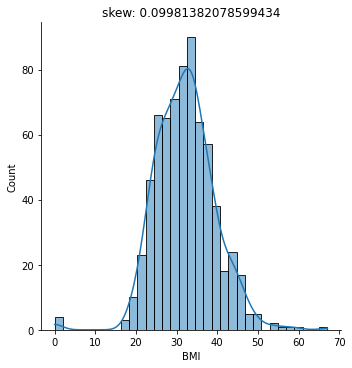

In [60]:
sns.displot(data=df_p1, x="BMI", kde=True)
plt.title('skew: {}'.format(skew(df_p1['BMI'])))

Text(0.5, 1.0, 'skew: 0.34236536740551604')

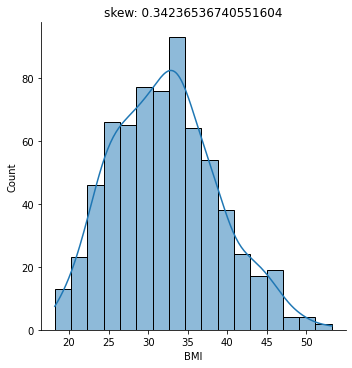

In [61]:
# using Z-Score as the data distribution is normal
from scipy import stats
z_scores = np.abs(stats.zscore(df_p1['BMI']))
filtered_entries = (z_scores < 3)
df_p1 = df_p1[filtered_entries]
sns.displot(data=df_p1, x="BMI", kde=True)
plt.title('skew: {}'.format(skew(df_p1['BMI'])))

Text(0.5, 1.0, 'skew: 1.595358281664109')

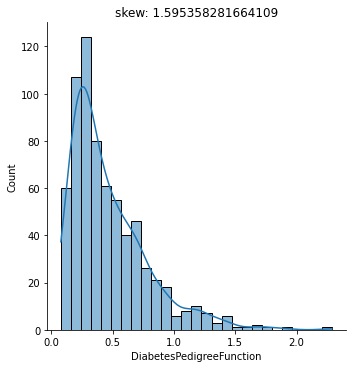

In [62]:
sns.displot(data=df_p1, x="DiabetesPedigreeFunction", kde=True)
plt.title('skew: {}'.format(skew(df_p1['DiabetesPedigreeFunction'])))

Q1= 0.245 Q3= 0.614 IQR= 0.369 low_limit= -0.3085 high_limit= 1.1675


Text(0.5, 1.0, 'skew: 0.903432184579501')

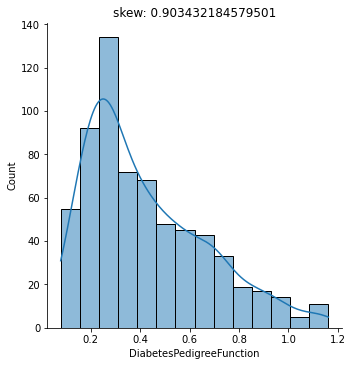

In [63]:
# Using IQR as data distribution is skewed
Q1 = df_p1['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = df_p1['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
print('Q1=',Q1,'Q3=',Q3,'IQR=',IQR,'low_limit=',low_limit,'high_limit=',high_limit)
filtered_entries = ((df_p1['DiabetesPedigreeFunction'] >= low_limit) & (df_p1['DiabetesPedigreeFunction'] <= high_limit))
df_p1 = df_p1[filtered_entries]
sns.displot(data=df_p1, x="DiabetesPedigreeFunction", kde=True)
plt.title('skew: {}'.format(skew(df_p1['DiabetesPedigreeFunction'])))

Text(0.5, 1.0, 'skew: 1.1300707038084048')

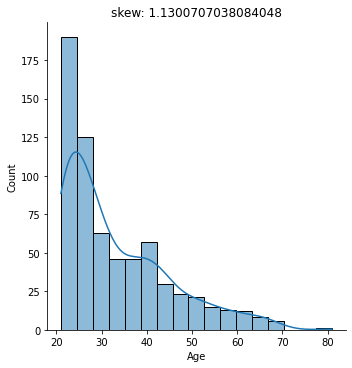

In [64]:
sns.displot(data=df_p1, x="Age", kde=True)
plt.title('skew: {}'.format(skew(df_p1['Age'])))

Q1= 24.0 Q3= 40.25 IQR= 16.25 low_limit= -0.375 high_limit= 64.625


Text(0.5, 1.0, 'skew: 0.978307970010861')

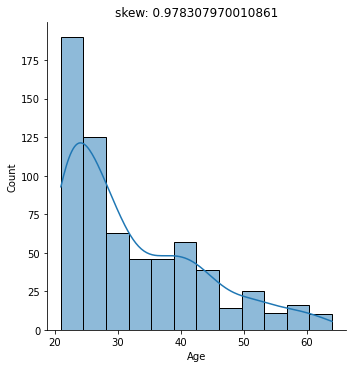

In [65]:
# Using IQR as data distribution is skewed
Q1 = df_p1['Age'].quantile(0.25)
Q3 = df_p1['Age'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
print('Q1=',Q1,'Q3=',Q3,'IQR=',IQR,'low_limit=',low_limit,'high_limit=',high_limit)
filtered_entries = ((df_p1['Age'] >= low_limit) & (df_p1['Age'] <= high_limit))
df_p1 = df_p1[filtered_entries]
sns.displot(data=df_p1, x="Age", kde=True)
plt.title('skew: {}'.format(skew(df_p1['Age'])))

## Outliers Detection Summary
> Detect and remove about 126 outliers in dataset

In [66]:
print(df.shape)
print(df_p1.shape)

(768, 9)
(642, 9)


## Oversampling for Imbalanced Data

To deal with majority data in the negative diabetes category, we're going to do oversampling to make distribution more even

In [67]:
df_p2 = df_p1
print(df_p2['Outcome'].value_counts())
x = df_p2[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df_p2['Outcome']

0    439
1    203
Name: Outcome, dtype: int64


In [68]:
from imblearn import over_sampling
x_over, y_over = over_sampling.RandomOverSampler().fit_resample(x,y)
print(pd.Series(y_over).value_counts())

1    439
0    439
Name: Outcome, dtype: int64


In [72]:
df_over = pd.DataFrame(x_over, columns= df[numericals].columns)
target_over = pd.DataFrame(y_over, columns= df[target].columns)
df_over.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,4.164009,124.595672,73.348519,20.668565,70.340547,32.792483,0.437498,33.892938
std,3.384582,30.293047,12.157900,15.686879,85.501600,6.517897,0.249348,10.976077
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,102.000000,64.250000,0.000000,0.000000,28.000000,0.247250,24.250000
50%,3.000000,121.000000,74.000000,23.000000,36.000000,32.800000,0.368000,31.000000
75%,7.000000,144.000000,80.000000,33.000000,129.000000,36.600000,0.593000,42.000000
max,13.000000,198.000000,122.000000,60.000000,325.000000,53.200000,1.162000,64.000000


Text(0, 0.5, 'Frequency')

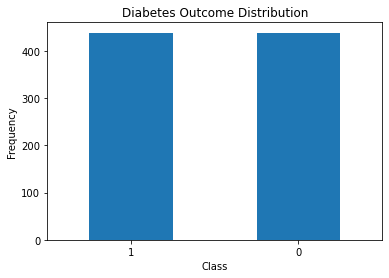

In [73]:
count_classes = pd.value_counts(target_over['Outcome'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title('Diabetes Outcome Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')

### Feature Scaling

As we have several different measurement unit in the independent features, therefore we're going to scale it using standarization and use it on Logistic and KNN as it does not really affect DTree algorithm.

In [74]:
from sklearn.preprocessing import StandardScaler

In [78]:
Std = StandardScaler()
dfX = pd.DataFrame(Std.fit_transform(df_over),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [79]:
dfX.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02
mean,1.382089e-16,2.737623e-16,-2.779351e-16,7.561656e-17,4.134885e-17,-3.955328e-16,1.418759e-16,1.621077e-16
std,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00
min,-1.230989e+00,-2.662050e+00,-4.061281e+00,-1.318321e+00,-8.231500e-01,-2.240109e+00,-1.442574e+00,-1.175309e+00
25%,-9.353629e-01,-7.463280e-01,-7.487893e-01,-1.318321e+00,-8.231500e-01,-7.356997e-01,-7.634163e-01,-8.790422e-01
50%,-3.441112e-01,-1.187639e-01,5.361550e-02,1.487080e-01,-4.018652e-01,1.153956e-03,-2.788769e-01,-2.637178e-01
75%,8.383922e-01,6.409189e-01,5.474030e-01,7.865467e-01,6.864537e-01,5.844964e-01,6.239915e-01,7.390329e-01
max,2.612147e+00,2.424522e+00,4.003916e+00,2.508711e+00,2.980115e+00,3.132782e+00,2.907245e+00,2.744534e+00


- - -
# Modeling After Pre-processing

In here we're going to try to do modeling first with pre-processing.

## Split Train Test Data

In [135]:
X = dfX[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = target_over['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)
X_train.shape

(614, 8)

## Logistic Regression

### Fit & Predict

In [82]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(random_state=0, max_iter=400)
logReg.fit(X_train, y_train)
y_predicted = logReg.predict(X_test)
y_predicted_proba = logReg.predict_proba(X_test)

### Evaluation

In [83]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score,  roc_auc_score, precision_score
print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted))

print('\n======================\nClassification Report:\n') # generate the confusion matrix
print(classification_report(y_test, y_predicted))


confustion matrix
[[100  24]
 [ 43  97]]

Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       124
           1       0.80      0.69      0.74       140

    accuracy                           0.75       264
   macro avg       0.75      0.75      0.75       264
weighted avg       0.75      0.75      0.75       264



## Logistic Regression Pre-Processing Evaluation

> - As a result of several Pre-Processing, overall the model have lower accuracy at 0.75 and also other negative score prediction at Precision, Recall and the f-1 score.
> - However Pre-Processing really bump up the model performance at the positive prediction sector. Especially on the Recall where it bumped from 0.53 to 0.69. On the Precision it went up to from 0.71 to 0.80
> - The F1 Score average at scoring positive diabetes is also improved from 0.60 to 0.74
> - Overall the Pre-Processing make the Logistic Regression model more good at predicting positive diabetes.

## KNN

### Fit & Predict

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) #using default value
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)
print(y_predicted)

[0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1
 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1
 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0
 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0
 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1
 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0]


### Evaluation

In [85]:
print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted))

print('\n======================\nClassification Report:\n') # generate the confusion matrix
print(classification_report(y_test, y_predicted))


confustion matrix
[[ 98  26]
 [ 36 104]]

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       124
           1       0.80      0.74      0.77       140

    accuracy                           0.77       264
   macro avg       0.77      0.77      0.77       264
weighted avg       0.77      0.77      0.77       264



## KNN Pre-Processing Evaluation

> - Pre-Processing also make good improvement on KNN, overall the model have better accuracy at 0.77 from 0.72 and other positive scoring on Recall and Precision is as well bump up hugely.
> - Recall got bumped up from 0.59 to 0.74 in positive scoring as well as precision went up from 0.56 to 0.80
> - The F1 Score average at scoring positive diabetes is also improved from 0.58 to 0.77
> - Overall the Pre-Processing make the KNN model more good at predicting positive diabetes.

## DTree (Gini) 

Refitting the X as we don't want to have DTree using standarization feature scaling

In [157]:
X = df_over[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = target_over['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)
X_train.shape

(614, 8)

### Fit & Predict

In [91]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0) #using entropy as calculation
dt.fit(X_train, y_train)
y_predicted = dt.predict(X_test)
print(y_predicted)

[1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1
 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0
 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1
 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1
 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1
 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1
 0 0 1 1 0]


### Evaluation

In [92]:
print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted))

print('\n======================\nClassification Report:\n') # generate the confusion matrix
print(classification_report(y_test, y_predicted))


confustion matrix
[[100  24]
 [ 16 124]]

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       124
           1       0.84      0.89      0.86       140

    accuracy                           0.85       264
   macro avg       0.85      0.85      0.85       264
weighted avg       0.85      0.85      0.85       264



## Decision Tree (Gini) Evaluation

> - Pre-Processing make Decision Tree exceptionally good, overall the model have better accuracy at 0.85 from 0.72 and other positive scoring on Recall and Precision is as well bump up hugely.
> - Recall got bumped up from 0.59 to 0.89 in positive scoring as well as precision went up from 0.56 to 0.84
> - The F1 Score average at scoring positive diabetes is also improved from 0.58 to 0.85
> - Overall the Pre-Processing make the Decision Tree model really good at predicting both negative positive diabetes.

# Hyperparameter Tuning
---

## Logistic Regression

### Logistic Regression GridSearch

In [100]:
from sklearn.model_selection import GridSearchCV

In [136]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [137]:
grid_search = GridSearchCV(logReg, param_grid, cv=5, verbose=True, n_jobs=-1)
best_model = grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 464 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 7388 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:    6.2s finished


In [138]:
best_model.best_params_

{'C': 0.23357214690901212,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [139]:
accuracy = best_model.best_score_
accuracy

0.757323737171798

In [140]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75       124
           1       0.81      0.68      0.74       140

    accuracy                           0.74       264
   macro avg       0.75      0.75      0.74       264
weighted avg       0.75      0.74      0.74       264



### Logistic Regression RandomSearch

In [141]:
from sklearn.model_selection import RandomizedSearchCV

In [142]:
random_search = RandomizedSearchCV(logReg, param_grid, cv=5, verbose=True, n_jobs=-1)

In [143]:
best_model = random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [144]:
best_model.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 2500, 'C': 10000.0}

In [145]:
accuracy = best_model.best_score_
accuracy

0.7475676396108223

In [146]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       124
           1       0.80      0.69      0.74       140

    accuracy                           0.75       264
   macro avg       0.75      0.75      0.75       264
weighted avg       0.75      0.75      0.75       264



## KNN

### KNN GridSearch

In [147]:
param_grid = [    
    {'n_neighbors':[5,6,7,8,9,10,11],
     'leaf_size':[1,2,3,5],
     'weights':['uniform', 'distance'],
     'algorithm':['auto', 'ball_tree','kd_tree','brute']
    }
]

In [148]:
grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=True, n_jobs=-1)
best_model = grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    1.0s finished


In [149]:
best_model.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 10, 'weights': 'distance'}

In [150]:
accuracy = best_model.best_score_
accuracy

0.8224310275889645

In [151]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       124
           1       0.83      0.91      0.87       140

    accuracy                           0.86       264
   macro avg       0.86      0.85      0.85       264
weighted avg       0.86      0.86      0.86       264



### KNN RandomSearch

In [152]:
random_search = RandomizedSearchCV(knn, param_grid, cv=5, verbose=True, n_jobs=-1)

In [153]:
best_model = random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [154]:
best_model.best_params_

{'weights': 'distance',
 'n_neighbors': 10,
 'leaf_size': 2,
 'algorithm': 'kd_tree'}

In [155]:
accuracy = best_model.best_score_
accuracy

0.8224310275889645

In [156]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       124
           1       0.83      0.91      0.87       140

    accuracy                           0.86       264
   macro avg       0.86      0.85      0.85       264
weighted avg       0.86      0.86      0.86       264



## DTree GridSearch

In [158]:
param_grid = [    
    {'criterion':['gini','entropy'],
     'splitter':['best','random'],
     'max_features':['auto','sqrt','log2']
    }
]

In [159]:
grid_search = GridSearchCV(dt, param_grid, cv=5, verbose=True, n_jobs=-1)
best_model = grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished


In [160]:
best_model.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'splitter': 'random'}

In [161]:
accuracy = best_model.best_score_
accuracy

0.8126882580301213

In [162]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       124
           1       0.82      0.87      0.84       140

    accuracy                           0.83       264
   macro avg       0.83      0.83      0.83       264
weighted avg       0.83      0.83      0.83       264



## DTree RandomSearch

In [163]:
random_search = RandomizedSearchCV(dt, param_grid, cv=5, verbose=True, n_jobs=-1)
best_model = random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [164]:
best_model.best_params_

{'splitter': 'random', 'max_features': 'log2', 'criterion': 'gini'}

In [165]:
best_model.best_score_

0.8126882580301213

In [166]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       124
           1       0.82      0.87      0.84       140

    accuracy                           0.83       264
   macro avg       0.83      0.83      0.83       264
weighted avg       0.83      0.83      0.83       264



## Hyperparameter Tuning Evaluation

> - Both GridSearch and RandomSearch greatly boost KNN Model performance with GridSearch at it best.
> - We don't see any significance boost yet we saw performance get lowered abit at Logistic Regression and Decision Tree with Hypertuning Parameter.

# Evaluation Summary
---
So far from the evaluation, KNN with GridSearch Hyperparameter tuning develop outstanding ML model to detect diabetes wether it is negative or positive diabetes compared to the other 2 in this dataset.

However Logistic Regression and Decision Tree is also still a great model for this dataset.

In the future I might update the overall evaluation of this notebook with ROCAUC and K-Cross Validation.